In [492]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import shapiro
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [493]:
df=pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

In [494]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [495]:
df.shape

(2111, 17)

In [496]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [497]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   int64  
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [498]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.315964,1.701620,86.586035,2.418986,2.685651,2.008053,1.010313,0.657861
std,6.357078,0.093368,26.191163,0.533996,0.778079,0.612950,0.850613,0.608926
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.630000,65.470000,2.000000,2.660000,1.585000,0.125000,0.000000
50%,23.000000,1.700000,83.000000,2.390000,3.000000,2.000000,1.000000,0.625000
75%,26.000000,1.770000,107.430000,3.000000,3.000000,2.480000,1.670000,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [499]:
df['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

# Preprocessing

## Check NULL Values

In [502]:
print(df.isnull().sum())

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


## Check Duplicate Data

In [504]:
print(df.duplicated().sum())

24


## Remove Duplicate data

In [506]:
df= df.drop_duplicates()
print(df.duplicated().sum())

0


# EDA

In [508]:
category= []
numerical= []

for i in df.columns:
  if 'int'in str(df[i].dtype) or 'float' in str(df[i].astype):
    numerical.append(i)
  else:
    category.append(i)

print(f'Categorial Columns: {category}')
print(f'Numerical Columns: {numerical}')

Categorial Columns: ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']
Numerical Columns: ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


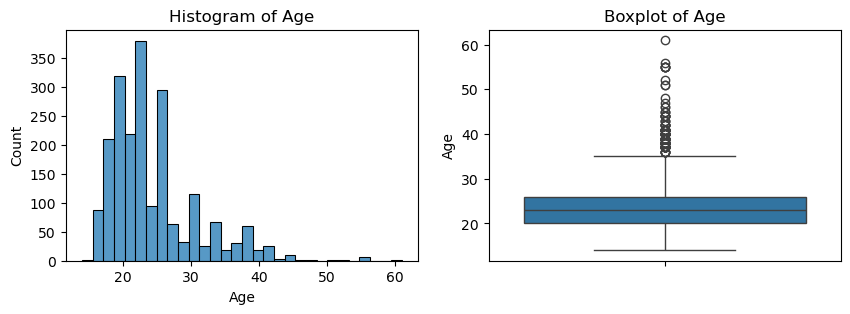

Age- skewness: 1.5065116779670538
Age- kurtosis: 2.7401128656581744


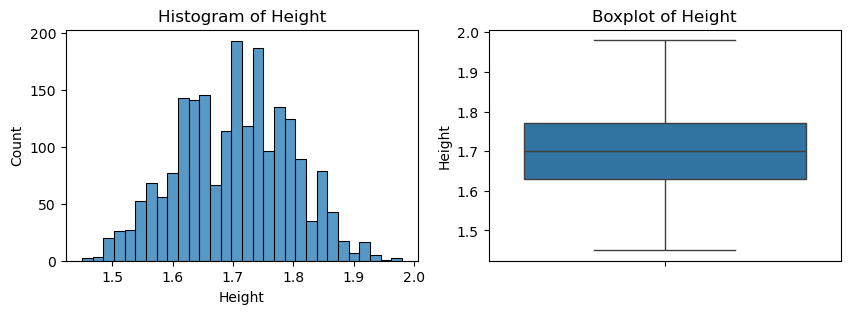

Height- skewness: -0.020970246364187595
Height- kurtosis: -0.5581723557993197


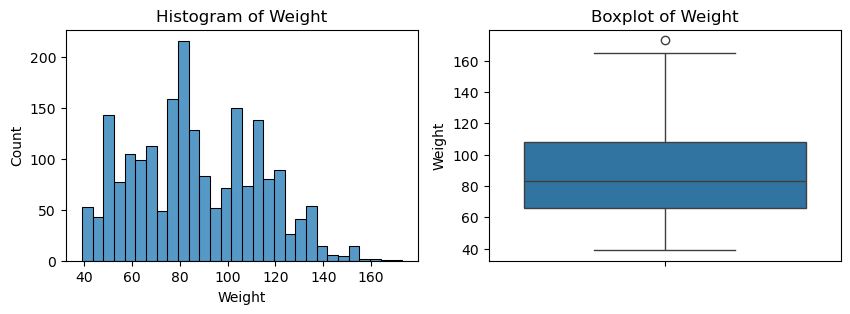

Weight- skewness: 0.24191389469080993
Weight- kurtosis: -0.7054636205236142


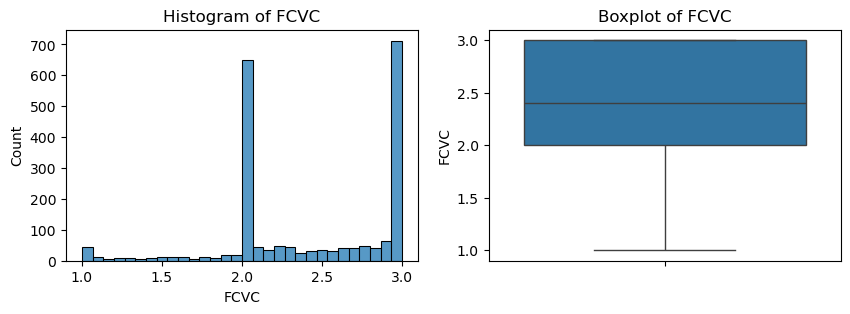

FCVC- skewness: -0.4483433527191593
FCVC- kurtosis: -0.6230838824193525


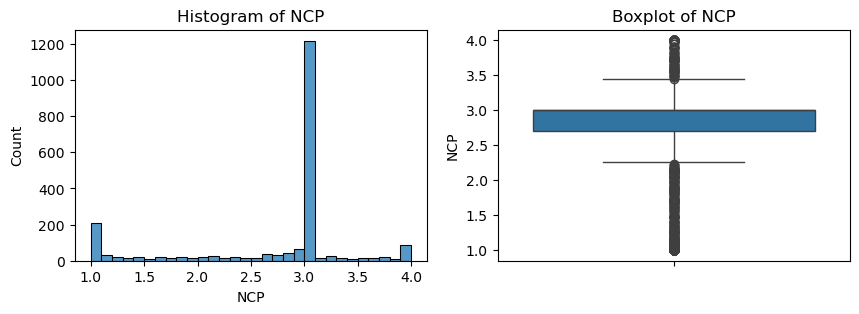

NCP- skewness: -1.1381109579240838
NCP- kurtosis: 0.5348109800173066


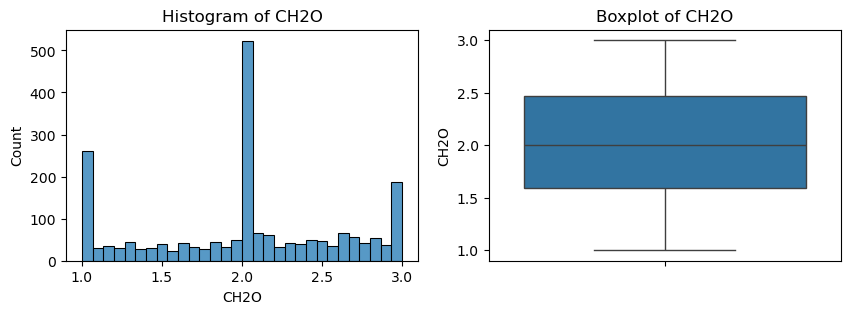

CH2O- skewness: -0.10644594318253729
CH2O- kurtosis: -0.8634670615990085


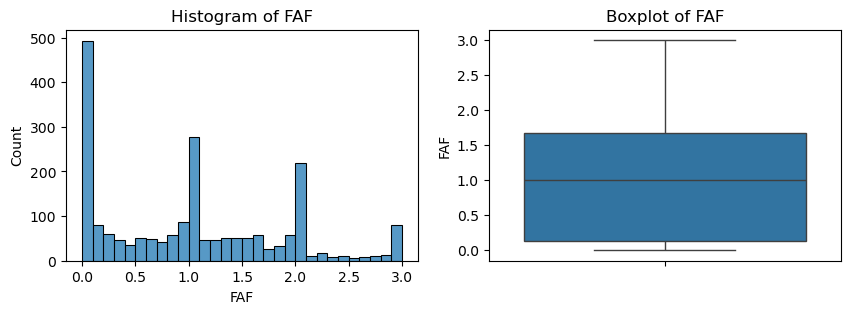

FAF- skewness: 0.4943768280112675
FAF- kurtosis: -0.6380494801446521


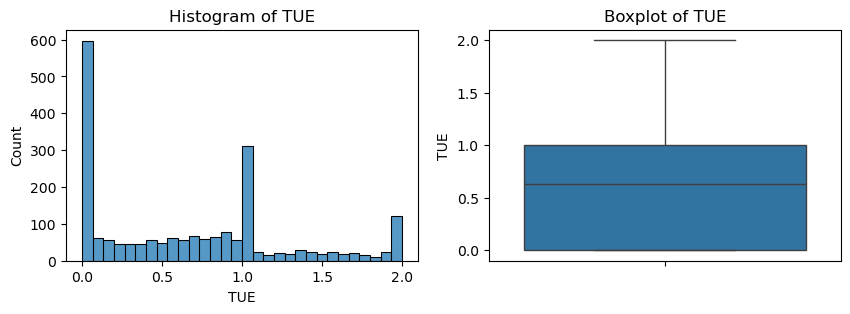

TUE- skewness: 0.6092465680720552
TUE- kurtosis: -0.5535856289201497


In [509]:
def dist_plot(df, numerical_cols):
  for i in numerical_cols:
    plt.figure(figsize=(10,3))

    plt.subplot(1,2,1)
    sns.histplot(df[i], bins=30)
    plt.title(f"Histogram of {i}")

    plt.subplot(1,2,2)
    sns.boxplot(df[i])
    plt.title(f"Boxplot of {i}")

    plt.show()

    print(f"{i}- skewness: {df[i].skew()}")
    print(f"{i}- kurtosis: {df[i].kurt()}")

dist_plot(df[numerical],numerical)

In [510]:
for i in numerical:
  print(i,":\n", shapiro(df[i]), "\n")

Age :
 ShapiroResult(statistic=0.867349415883782, pvalue=7.366233644163821e-39) 

Height :
 ShapiroResult(statistic=0.9925066797058947, pvalue=7.378004031873293e-09) 

Weight :
 ShapiroResult(statistic=0.9769165101091697, pvalue=7.264869617073928e-18) 

FCVC :
 ShapiroResult(statistic=0.8455736932408998, pvalue=4.346170157449133e-41) 

NCP :
 ShapiroResult(statistic=0.7391338694513849, pvalue=2.8310008159099577e-49) 

CH2O :
 ShapiroResult(statistic=0.9349931414647861, pvalue=2.9017969922245954e-29) 

FAF :
 ShapiroResult(statistic=0.9151867834506322, pvalue=1.124917526665828e-32) 

TUE :
 ShapiroResult(statistic=0.8886953055713287, pvalue=2.289608346316529e-36) 



C:\Users\imant\AppData\Local\Temp\ipykernel_22080\2062586871.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(categories))


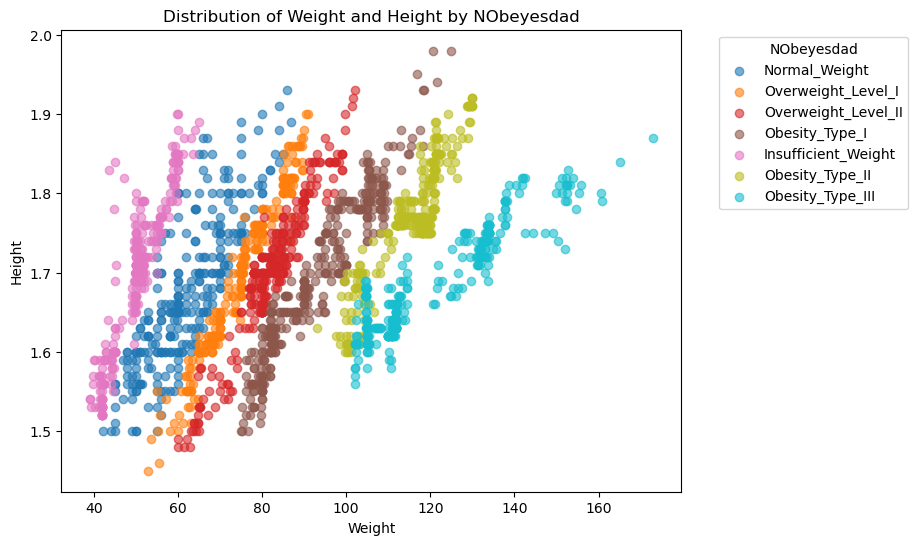

In [511]:
categories = df['NObeyesdad'].unique()
colors = plt.cm.get_cmap('tab10', len(categories))

plt.figure(figsize=(8, 6))

for i, category in enumerate(categories):
    subset = df[df['NObeyesdad'] == category]
    plt.scatter(subset['Weight'], subset['Height'], color=colors(i), label=category, alpha=0.6)

plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Distribution of Weight and Height by NObeyesdad')
plt.legend(title='NObeyesdad', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

# Encoding

In [513]:
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"Unique values in '{col}':")
    print(df[col].unique())
    print("-" * 50)

Unique values in 'Gender':
['Female' 'Male']
--------------------------------------------------
Unique values in 'family_history_with_overweight':
['yes' 'no']
--------------------------------------------------
Unique values in 'FAVC':
['no' 'yes']
--------------------------------------------------
Unique values in 'CAEC':
['Sometimes' 'Frequently' 'Always' 'no']
--------------------------------------------------
Unique values in 'SMOKE':
['no' 'yes']
--------------------------------------------------
Unique values in 'SCC':
['no' 'yes']
--------------------------------------------------
Unique values in 'CALC':
['no' 'Sometimes' 'Frequently' 'Always']
--------------------------------------------------
Unique values in 'MTRANS':
['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
--------------------------------------------------
Unique values in 'NObeyesdad':
['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Ty

In [514]:
label_enc_cols = ['CAEC', 'CALC', 'MTRANS']
label_encoders = {}

for col in label_enc_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le 

binary_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
for col in binary_cols:
    df[col] = df[col].map({'no': 0, 'yes': 1, 'Female': 0, 'Male': 1})  

df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,Normal_Weight
1,0,21,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,Normal_Weight
2,1,23,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,Normal_Weight
3,1,27,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,Overweight_Level_I
4,1,22,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,Overweight_Level_II


In [515]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2087 non-null   int64  
 1   Age                             2087 non-null   int64  
 2   Height                          2087 non-null   float64
 3   Weight                          2087 non-null   float64
 4   family_history_with_overweight  2087 non-null   int64  
 5   FAVC                            2087 non-null   int64  
 6   FCVC                            2087 non-null   float64
 7   NCP                             2087 non-null   float64
 8   CAEC                            2087 non-null   int32  
 9   SMOKE                           2087 non-null   int64  
 10  CH2O                            2087 non-null   float64
 11  SCC                             2087 non-null   int64  
 12  FAF                             2087 no

# Split Data into Train and Test Data

In [517]:
x= df.drop(columns=["NObeyesdad"])
y= df["NObeyesdad"]

In [518]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Scaling

In [520]:
robust= RobustScaler()

x_train[numerical]= robust.fit_transform(x_train[numerical])
x_test[numerical]= robust.transform(x_test[numerical])

In [521]:
x_train.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
44,1,-0.333333,0.785714,-0.079201,0,0,-1.43,0.000000,3,0,0.000000,0,0.657895,-0.631,3,3
691,1,-0.833333,0.642857,-0.764805,0,1,0.49,0.000000,2,0,-0.258824,0,0.052632,0.369,2,3
667,1,-0.166667,1.214286,-0.526721,1,1,0.57,0.764706,2,0,0.270588,0,0.368421,-0.631,2,0
170,1,-0.166667,0.142857,-0.031054,0,1,-0.43,-5.882353,2,0,0.000000,0,0.657895,0.369,2,3
310,1,-1.000000,0.642857,-0.632884,1,1,-0.43,2.941176,1,0,0.000000,0,0.657895,0.369,3,3


# Train Model

In [523]:
RF_class = RandomForestClassifier(criterion= 'gini', max_depth= 4)
RF_class.fit(x_train, y_train)

RandomForestClassifier(max_depth=4)

In [524]:
y_pred=RF_class.predict(x_test)

In [525]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.81      0.92      0.86        59
      Normal_Weight       0.65      0.54      0.59        61
     Obesity_Type_I       0.76      0.90      0.82        70
    Obesity_Type_II       0.97      1.00      0.98        64
   Obesity_Type_III       1.00      1.00      1.00        60
 Overweight_Level_I       0.82      0.58      0.68        55
Overweight_Level_II       0.63      0.67      0.65        49

           accuracy                           0.81       418
          macro avg       0.81      0.80      0.80       418
       weighted avg       0.81      0.81      0.81       418



# Tuning Model

In [527]:
parameter = {
    'n_estimators': [100, 200, 300],
    'max_depth': [2, 4, 6, 8],
    'min_samples_leaf': [1, 3, 5]
}

In [528]:
model_tune= GridSearchCV(RandomForestClassifier(),
                             parameter,
                             scoring='f1_macro',
                             cv=5,
                             verbose=2,
                             n_jobs=-1)

model_tune.fit(x_train,y_train)

best_model= model_tune.best_estimator_
best_model

Fitting 5 folds for each of 36 candidates, totalling 180 fits


RandomForestClassifier(max_depth=8, n_estimators=300)

In [529]:
y_pred= best_model.predict(x_test)

In [530]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.97      0.95      0.96        59
      Normal_Weight       0.83      0.90      0.87        61
     Obesity_Type_I       0.99      0.94      0.96        70
    Obesity_Type_II       1.00      1.00      1.00        64
   Obesity_Type_III       1.00      1.00      1.00        60
 Overweight_Level_I       0.92      0.84      0.88        55
Overweight_Level_II       0.87      0.94      0.90        49

           accuracy                           0.94       418
          macro avg       0.94      0.94      0.94       418
       weighted avg       0.94      0.94      0.94       418



Total null values:
 Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

Total duplicated data before: 24

Total duplicated data after: 0


C:\Users\imant\AppData\Local\Temp\ipykernel_22080\4218726374.py:35: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(categories))


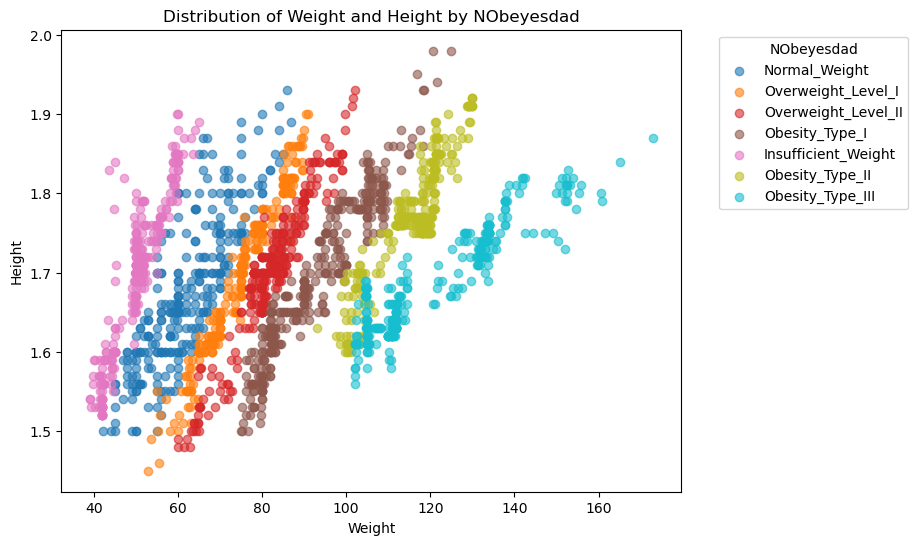

Categorical Columns: []
Numerical Columns: ['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS']

Classification Report

                     precision    recall  f1-score   support

Insufficient_Weight       0.79      0.92      0.85        59
      Normal_Weight       0.71      0.59      0.64        61
     Obesity_Type_I       0.76      0.86      0.81        70
    Obesity_Type_II       0.96      1.00      0.98        64
   Obesity_Type_III       1.00      1.00      1.00        60
 Overweight_Level_I       0.91      0.58      0.71        55
Overweight_Level_II       0.59      0.69      0.64        49

           accuracy                           0.81       418
          macro avg       0.82      0.81      0.80       418
       weighted avg       0.82      0.81      0.81       418

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Classification Report for Best Model



In [576]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import shapiro
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

import pickle

class Preprocessing:
    def __init__(self, filepath):
        self.filepath= filepath
        self.df= None
        self.label_encoder= LabelEncoder()
        self.label_encoders = {}

    def read_data(self):
        self.df= pd.read_csv(self.filepath)

    def check_null_values(self):
        print("Total null values:\n", self.df.isnull().sum())

    def check_duplicate_data(self):
        print("\nTotal duplicated data before:", self.df.duplicated().sum())

    def remove_duplicate_data(self):
        self.df = self.df.drop_duplicates()
        print("\nTotal duplicated data after:",self.df.duplicated().sum())

    def plot_weight_height(self):
        categories= self.df['NObeyesdad'].unique()
        colors = plt.cm.get_cmap('tab10', len(categories))

        plt.figure(figsize=(8, 6))
        for i, category in enumerate(categories):
            subset = self.df[self.df['NObeyesdad'] == category]
            plt.scatter(subset['Weight'], subset['Height'], color=colors(i), label=category, alpha=0.6)

        plt.xlabel('Weight')
        plt.ylabel('Height')
        plt.title('Distribution of Weight and Height by NObeyesdad')
        plt.legend(title='NObeyesdad', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.show()

    def encoding(self):
        label_enc_cols = ['CAEC', 'CALC']
        binary_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
        
        for col in label_enc_cols:
            le = LabelEncoder()
            self.df[col] = le.fit_transform(self.df[col])
            self.label_encoders[col] = le
        
        for col in binary_cols:
            self.df[col] = self.df[col].map({'no': 0, 'yes': 1, 'Female': 0, 'Male': 1})
        
        transport_mapping = {
            'Public_Transportation': 0, 
            'Walking': 1, 
            'Automobile': 2, 
            'Motorbike': 3, 
            'Bike': 4
        }
        self.df['MTRANS'] = self.df['MTRANS'].map(transport_mapping)
    
    def define_x_y(self):
        x= self.df.drop(columns=["NObeyesdad"])
        y= self.df["NObeyesdad"]
        return x,y

class Modeling:
    def __init__(self, x, y):
        self.x= x
        self.y= y
        
        self.categorical_cols = []
        self.numerical_cols = []
        self.identify_columns()
        
        self.scaler = RobustScaler()
        
        self.x_train, self.x_test, self.y_train, self.y_test, self.y_pred, self.best_model= [None] * 6
        self.model= RandomForestClassifier(criterion= 'gini', max_depth= 4)
        
    def identify_columns(self):
        for col in self.x.columns:
            if 'int' in str(self.x[col].dtype) or 'float' in str(self.x[col].dtype):
                self.numerical_cols.append(col)
            else:
                self.categorical_cols.append(col)
        print(f'Categorical Columns: {self.categorical_cols}')
        print(f'Numerical Columns: {self.numerical_cols}')
        
    def split_data(self):
        self.x_train, self.x_test, self.y_train, self.y_test= train_test_split(self.x, self.y, test_size= 0.2, random_state= 42)

    def scale_data(self):
        self.x_train[self.numerical_cols] =  self.scaler.fit_transform(self.x_train[self.numerical_cols])
        self.x_test[self.numerical_cols] =  self.scaler.transform(self.x_test[self.numerical_cols])

    def train(self):
        self.model.fit(self.x_train, self.y_train)

    def evaluate(self):
        self.y_pred= self.model.predict(self.x_test)
        print("\nClassification Report\n")
        print(classification_report(self.y_test, self.y_pred))

    def hyperparameter_tuning(self):
        parameter = {
            'n_estimators': [100, 200, 300],
            'max_depth': [2, 4, 6, 8],
            'min_samples_leaf': [1, 3, 5]
        }
        model_tune= GridSearchCV(self.model, parameter, cv= 5, verbose=2, scoring= "f1_weighted", n_jobs= -1)
        model_tune.fit(self.x_train, self.y_train)
        self.best_model= model_tune.best_estimator_
        
    def evaluate_best_model(self):
        self.y_pred= self.best_model.predict(self.x_test)
        print("Classification Report for Best Model\n")
        print(classification_report(self.y_test, self.y_pred))

    def model_save(self, filepath):
        with open(filepath, "wb") as f:
          pickle.dump(self.best_model, f)

Preprocessing= Preprocessing("ObesityDataSet_raw_and_data_sinthetic.csv")
Preprocessing.read_data()
Preprocessing.check_null_values()
Preprocessing.check_duplicate_data()
Preprocessing.remove_duplicate_data()
Preprocessing.plot_weight_height()
Preprocessing.encoding()
x, y= Preprocessing.define_x_y()

Modeling= Modeling(x, y)
Modeling.split_data()
Modeling.scale_data()
Modeling.train()
Modeling.evaluate()
Modeling.hyperparameter_tuning()
Modeling.evaluate_best_model()

Modeling.model_save("Obesity_model.pkl")